In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import os
import zipfile

# Define the path to the zip file in your Google Drive
zip_file_path = '/content/drive/My Drive/dog_cat_cleaned.zip'

# Unzipping the dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

# The extracted dataset should now be available at /content/dataset
print("Dataset extracted!")


Mounted at /content/drive
Dataset extracted!


In [2]:
# Define dataset paths
base_dir = '/content/dataset/dog_cat_cleaned'
cats_dir = os.path.join(base_dir, 'cat')
dogs_dir = os.path.join(base_dir, 'dog')

# Create directories for training and validation sets
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

print(f"Train and validation directories created!")


Train and validation directories created!


In [3]:
import os
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Function to balance images in each breed directory
def balance_all_breeds(source_dir, target_size=150):
    """
    Balances data by reducing the number of images to 500 per breed.
    If a breed has fewer than 500 images, data augmentation is applied to reach 500 images.
    """
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Iterate over each breed folder
    for breed in os.listdir(source_dir):
        breed_path = os.path.join(source_dir, breed)
        if os.path.isdir(breed_path):
            images = os.listdir(breed_path)
            print(f"Processing {breed} with {len(images)} images...")

            # If there are more than 500 images, randomly sample 500
            if len(images) > target_size:
                images = random.sample(images, target_size)
            # If there are fewer than 500 images, augment the data
            elif len(images) < target_size:
                while len(images) < target_size:
                    image_to_augment = random.choice(images)
                    img_path = os.path.join(breed_path, image_to_augment)
                    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
                    x = tf.keras.preprocessing.image.img_to_array(img)
                    x = x.reshape((1,) + x.shape)
                    i = 0
                    for batch in datagen.flow(x, batch_size=1, save_to_dir=breed_path, save_prefix="aug", save_format="jpeg"):
                        images.append(batch)  # Add augmented image
                        i += 1
                        if len(images) >= target_size:
                            break
            print(f"{breed} now has {len(images)} images.")

# Apply to all breeds in cats directory
balance_all_breeds(cats_dir)

# Similarly, apply to all breeds in dogs directory
balance_all_breeds(dogs_dir)


Processing Himalayan with 1301 images...
Himalayan now has 150 images.
Processing Pixiebob with 111 images...
Pixiebob now has 150 images.
Processing Applehead Siamese with 135 images...
Applehead Siamese now has 150 images.
Processing Tonkinese with 259 images...
Tonkinese now has 150 images.
Processing Silver with 94 images...
Silver now has 150 images.
Processing Snowshoe with 1625 images...
Snowshoe now has 150 images.
Processing Chartreux with 83 images...
Chartreux now has 150 images.
Processing Chinchilla with 3 images...
Chinchilla now has 150 images.
Processing Tortoiseshell with 3963 images...
Tortoiseshell now has 150 images.
Processing Somali with 36 images...
Somali now has 150 images.
Processing LaPerm with 17 images...
LaPerm now has 150 images.
Processing Canadian Hairless with 4 images...
Canadian Hairless now has 150 images.
Processing Havana with 184 images...
Havana now has 150 images.
Processing American Shorthair with 5291 images...
American Shorthair now has 150 

In [11]:
import os
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Function to balance images in each breed directory
def balance_all_breeds(source_dir, target_size=150):
    """
    Balances data by reducing the number of images to 150 per breed.
    If a breed has fewer than 150 images, data augmentation is applied to reach 150 images.
    """
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Iterate over each breed folder
    for breed in os.listdir(source_dir):
        breed_path = os.path.join(source_dir, breed)
        if os.path.isdir(breed_path):
            images = os.listdir(breed_path)
            print(f"Processing {breed} with {len(images)} images...")

            # If there are more than 150 images, randomly sample 150
            if len(images) > target_size:
                images_to_keep = random.sample(images, target_size)
                # Delete extra images to limit to 150
                for img in images:
                    if img not in images_to_keep:
                        os.remove(os.path.join(breed_path, img))
                images = images_to_keep  # Update the list of images after deletion
                print(f"Reduced {breed} to {len(images)} images.")

            # If there are fewer than 150 images, augment the data to reach 150
            elif len(images) < target_size:
                while len(images) < target_size:
                    image_to_augment = random.choice(images)
                    img_path = os.path.join(breed_path, image_to_augment)
                    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
                    x = tf.keras.preprocessing.image.img_to_array(img)
                    x = x.reshape((1,) + x.shape)
                    i = 0
                    for batch in datagen.flow(x, batch_size=1, save_to_dir=breed_path, save_prefix="aug", save_format="jpeg"):
                        images.append(batch)  # Add augmented image
                        i += 1
                        if len(images) >= target_size:
                            break
                print(f"Augmented {breed} to {len(images)} images.")

# Apply to all breeds in cats directory
balance_all_breeds('/content/dataset/dog_cat_cleaned/cat')

# Similarly, apply to all breeds in dogs directory
balance_all_breeds('/content/dataset/dog_cat_cleaned/dog')


Processing Himalayan with 1301 images...
Reduced Himalayan to 150 images.
Processing Pixiebob with 150 images...
Processing Applehead Siamese with 150 images...
Processing Tonkinese with 259 images...
Reduced Tonkinese to 150 images.
Processing Silver with 150 images...
Processing Snowshoe with 1625 images...
Reduced Snowshoe to 150 images.
Processing Chartreux with 149 images...
Augmented Chartreux to 150 images.
Processing Chinchilla with 149 images...
Augmented Chinchilla to 150 images.
Processing Tortoiseshell with 3963 images...
Reduced Tortoiseshell to 150 images.
Processing Somali with 150 images...
Processing LaPerm with 150 images...
Processing Canadian Hairless with 150 images...
Processing Havana with 184 images...
Reduced Havana to 150 images.
Processing American Shorthair with 5291 images...
Reduced American Shorthair to 150 images.
Processing Turkish Van with 813 images...
Reduced Turkish Van to 150 images.
Processing York Chocolate with 148 images...
Augmented York Choco

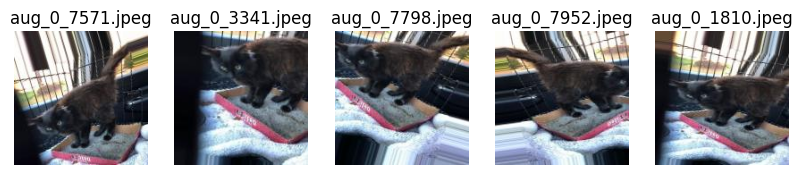

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

# Function to display random images from a breed folder
def display_random_images_from_breed(breed_folder, num_images=5):
    """
    Displays `num_images` random images from the given breed folder.
    """
    images = os.listdir(breed_folder)
    random_images = random.sample(images, min(num_images, len(images)))  # Pick random images

    plt.figure(figsize=(10, 10))

    for i, img_name in enumerate(random_images):
        img_path = os.path.join(breed_folder, img_name)
        img = mpimg.imread(img_path)

        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.axis('off')  # Hide axes
        plt.title(f"{img_name}")

    plt.show()

# Example: Display 5 random images from a breed in cats_dir (e.g., Persian cat)
breed_folder = os.path.join(cats_dir, 'York Chocolate')  # Change 'Persian' to any breed folder name you want
display_random_images_from_breed(breed_folder, num_images=5)

# Example: Display 5 random images from a breed in dogs_dir
# breed_folder = os.path.join(dogs_dir, 'Golden_Retriever')  # Change breed as necessary
# display_random_images_from_breed(breed_folder, num_images=5)


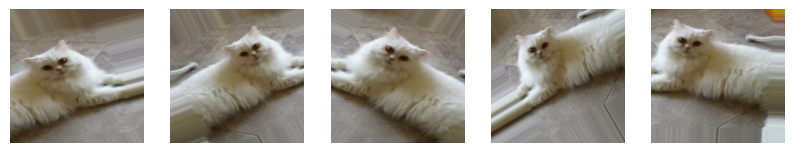

In [5]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Function to display augmented images
def display_augmented_images(image_path, num_augmented_images=5):
    """
    Displays `num_augmented_images` augmented versions of the given image.
    """
    # Load the image and convert it to an array
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(150, 150))
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = x.reshape((1,) + x.shape)  # Reshape image to (1, 150, 150, 3)

    # Create an ImageDataGenerator with augmentation options
    datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Generate augmented images and plot them
    plt.figure(figsize=(10, 10))
    i = 0
    for batch in datagen.flow(x, batch_size=1):
        plt.subplot(1, num_augmented_images, i+1)
        augmented_image = batch[0].astype('uint8')  # Convert the image back to uint8
        plt.imshow(augmented_image)
        plt.axis('off')  # Hide axes
        i += 1
        if i >= num_augmented_images:
            break

    plt.show()

# Example: Pick one image from the dataset to augment
# Change the path to any image you want to augment
image_path = os.path.join(cats_dir, 'Persian', os.listdir(os.path.join(cats_dir, 'Persian'))[0])  # Change 'Persian' to the desired breed
display_augmented_images(image_path, num_augmented_images=5)


In [12]:
import os

def count_images_in_directory(directory):
    total_images = 0
    for breed in os.listdir(directory):
        breed_path = os.path.join(directory, breed)
        if os.path.isdir(breed_path):
            num_images = len(os.listdir(breed_path))
            print(f"Breed: {breed}, Number of images: {num_images}")
            total_images += num_images
    print(f"Total images in {directory}: {total_images}")

# Check the number of images in the cat and dog directories
cat_dir = '/content/dataset/dog_cat_cleaned/cat'
dog_dir = '/content/dataset/dog_cat_cleaned/dog'

print("Cat Images:")
count_images_in_directory(cat_dir)

print("\nDog Images:")
count_images_in_directory(dog_dir)



Cat Images:
Breed: Himalayan, Number of images: 150
Breed: Pixiebob, Number of images: 150
Breed: Applehead Siamese, Number of images: 150
Breed: Tonkinese, Number of images: 150
Breed: Silver, Number of images: 150
Breed: Snowshoe, Number of images: 150
Breed: Chartreux, Number of images: 150
Breed: Chinchilla, Number of images: 150
Breed: Tortoiseshell, Number of images: 150
Breed: Somali, Number of images: 150
Breed: LaPerm, Number of images: 150
Breed: Canadian Hairless, Number of images: 150
Breed: Havana, Number of images: 150
Breed: American Shorthair, Number of images: 150
Breed: Turkish Van, Number of images: 150
Breed: York Chocolate, Number of images: 150
Breed: Tabby, Number of images: 150
Breed: Egyptian Mau, Number of images: 150
Breed: Russian Blue, Number of images: 150
Breed: Ocicat, Number of images: 150
Breed: Extra-Toes Cat - Hemingway Polydactyl, Number of images: 150
Breed: Domestic Short Hair, Number of images: 150
Breed: Tiger, Number of images: 150
Breed: Manx,

In [51]:
import os
import zipfile
from google.colab import drive

# First, mount your Google Drive
drive.mount('/content/drive')

# Define the path to the balanced dataset
balanced_dataset_dir = '/content/dataset/dog_cat_cleaned'

# Define the output zip file path in Google Drive
zip_file_path = '/content/drive/My Drive/dog_cat_balanced.zip'

# Function to zip the directory
def zipdir(path, ziph):
    # Zip the directory
    for root, dirs, files in os.walk(path):
        for file in files:
            # Write each file to the zip file
            ziph.write(os.path.join(root, file),
                       os.path.relpath(os.path.join(root, file),
                       os.path.join(path, '..')))

# Create a zip file
with zipfile.ZipFile(zip_file_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    zipdir(balanced_dataset_dir, zipf)

print(f"Balanced dataset successfully zipped and saved to: {zip_file_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Balanced dataset successfully zipped and saved to: /content/drive/My Drive/dog_cat_balanced.zip


In [13]:
from PIL import Image
import os

def remove_corrupt_images(directory):
    """
    Identify and remove corrupt images from the dataset.
    """
    for breed in os.listdir(directory):
        breed_path = os.path.join(directory, breed)
        if os.path.isdir(breed_path):
            for image_name in os.listdir(breed_path):
                image_path = os.path.join(breed_path, image_name)
                try:
                    img = Image.open(image_path)
                    img.verify()  # Verify if it's an image
                except (IOError, SyntaxError) as e:
                    print(f"Removing corrupt image: {image_path}")
                    os.remove(image_path)  # Remove corrupt image

# Apply to both cats and dogs directories
cat_dir = '/content/dataset/dog_cat_cleaned/cat'
dog_dir = '/content/dataset/dog_cat_cleaned/dog'

print("Removing corrupt images from cat directory...")
remove_corrupt_images(cat_dir)

print("\nRemoving corrupt images from dog directory...")
remove_corrupt_images(dog_dir)


Removing corrupt images from cat directory...

Removing corrupt images from dog directory...


In [58]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import UnidentifiedImageError

# Custom function to wrap the ImageDataGenerator flow_from_directory to skip corrupt images
def custom_image_generator(directory, target_size, batch_size, class_mode, subset):
    """
    Custom generator to skip corrupt images during training and validation.
    """
    datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=0.2  # 80% training, 20% validation
    )

    generator = datagen.flow_from_directory(
        directory,
        target_size=target_size,
        batch_size=batch_size,
        class_mode=class_mode,
        subset=subset
    )

    while True:
        try:
            batch = next(generator)
            yield batch
        except (OSError, UnidentifiedImageError) as e:
            print(f"Skipping corrupt image: {e}")
            continue

# Define paths to your cleaned train and validation datasets
train_dir = '/content/dataset/dog_cat_cleaned'  # Root folder containing both 'cat' and 'dog' folders

# Define batch size and target size for images
batch_size = 32
target_size = (224, 224)

# Create training and validation generators using the custom function
train_generator = custom_image_generator(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Use for training data
)

validation_generator = custom_image_generator(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Use for validation data
)

# Load a pretrained MobileNetV2 model, excluding the top layers
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the base model to avoid retraining ImageNet weights

# Build the custom model on top of the pretrained base
model = models.Sequential([
    base_model,  # Pretrained base
    layers.GlobalAveragePooling2D(),  # Pooling layer to reduce dimensions
    layers.Dense(256, activation='relu'),  # Fully connected layer
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(4, activation='softmax')  # Final layer for 4-class classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=701,  # Adjust based on your dataset
    epochs=3,
    validation_data=validation_generator,
    validation_steps=175  # Adjust based on your dataset
)

# Evaluate the model
val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")


Found 22440 images belonging to 4 classes.
Epoch 1/3
683/701 ━━━━━━━━━━━━━━━━━━━━ 7s 389ms/step - accuracy: 0.9017 - loss: 0.2499Skipping corrupt image: broken data stream when reading image file
701/701 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step - accuracy: 0.9026 - loss: 0.2476Found 5610 images belonging to 4 classes.
701/701 ━━━━━━━━━━━━━━━━━━━━ 351s 491ms/step - accuracy: 0.9026 - loss: 0.2474 - val_accuracy: 0.9446 - val_loss: 0.1383
Epoch 2/3
671/701 ━━━━━━━━━━━━━━━━━━━━ 11s 392ms/step - accuracy: 0.9629 - loss: 0.0959Skipping corrupt image: broken data stream when reading image file
701/701 ━━━━━━━━━━━━━━━━━━━━ 343s 490ms/step - accuracy: 0.9630 - loss: 0.0958 - val_accuracy: 0.9460 - val_loss: 0.1287
Epoch 3/3
172/701 ━━━━━━━━━━━━━━━━━━━━ 3:27 393ms/step - accuracy: 0.9649 - loss: 0.0975Skipping corrupt image: broken data stream when reading image file
701/701 ━━━━━━━━━━━━━━━━━━━━ 339s 484ms/step - accuracy: 0.9679 - loss: 0.0885 - val_accuracy: 0.9462 - val_loss: 0.1431
    512/Unknow

KeyboardInterrupt: 

In [60]:
import math
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Define paths to your cleaned train and validation datasets
train_dir = '/content/dataset/dog_cat_cleaned'  # Root folder containing both 'cat' and 'dog' folders

# Define batch size and target size for images
batch_size = 32
target_size = (224, 224)

# Custom function to handle corrupt images during data loading
def custom_image_generator(directory, target_size, batch_size, class_mode, subset):
    datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=0.2  # 80% training, 20% validation
    )

    generator = datagen.flow_from_directory(
        directory,
        target_size=target_size,
        batch_size=batch_size,
        class_mode=class_mode,
        subset=subset
    )

    while True:
        try:
            batch = next(generator)
            yield batch
        except (OSError, tf.errors.InvalidArgumentError) as e:
            print(f"Skipping corrupt image: {e}")
            continue

# Create training and validation generators
train_generator = custom_image_generator(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = custom_image_generator(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Calculate steps_per_epoch and validation_steps
steps_per_epoch = math.ceil(22440 / batch_size)  # Replace 22440 with your actual number of training images
validation_steps = math.ceil(5610 / batch_size)  # Replace 5610 with your actual number of validation images

# Print the calculated values for reference
print(f"Calculated steps_per_epoch: {steps_per_epoch}")
print(f"Calculated validation_steps: {validation_steps}")

# Load a pretrained MobileNetV2 model, excluding the top layers
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the base model to avoid retraining ImageNet weights

# Build the custom model on top of the pretrained base
model = models.Sequential([
    base_model,  # Pretrained base
    layers.GlobalAveragePooling2D(),  # Pooling layer to reduce dimensions
    layers.Dense(256, activation='relu'),  # Fully connected layer
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(4, activation='softmax')  # Final layer for 4-class classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model using the calculated steps_per_epoch and validation_steps
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=1,  # Adjust as necessary
    validation_data=validation_generator,
    validation_steps=validation_steps
)

# Evaluate the model on validation data
val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")

# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()

# Predict on validation data
validation_generator.reset()
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Print classification report
print('Classification Report')
target_names = list(validation_generator.class_indices.keys())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# Print confusion matrix
print('Confusion Matrix')
conf_matrix = confusion_matrix(validation_generator.classes, y_pred)
print(conf_matrix)


Calculated steps_per_epoch: 702
Calculated validation_steps: 176
Found 22440 images belonging to 4 classes.
471/702 ━━━━━━━━━━━━━━━━━━━━ 1:31 395ms/step - accuracy: 0.8926 - loss: 0.2849Skipping corrupt image: broken data stream when reading image file
701/702 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - accuracy: 0.9059 - loss: 0.2479Found 5610 images belonging to 4 classes.
702/702 ━━━━━━━━━━━━━━━━━━━━ 363s 506ms/step - accuracy: 0.9060 - loss: 0.2476 - val_accuracy: 0.9472 - val_loss: 0.1378
    337/Unknown 135s 402ms/step - accuracy: 0.9466 - loss: 0.1368

KeyboardInterrupt: 

In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import UnidentifiedImageError, ImageFile
import math

# Enable error handling for loading truncated images
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Custom generator that skips corrupt images
def safe_flow_from_directory(datagen, directory, target_size, batch_size, class_mode, subset):
    generator = datagen.flow_from_directory(
        directory,
        target_size=target_size,
        batch_size=batch_size,
        class_mode=class_mode,
        subset=subset
    )

    while True:
        try:
            # Yield batch
            yield next(generator)
        except (OSError, UnidentifiedImageError) as e:
            print(f"Skipping corrupt image: {e}")
            continue  # Skip and move on to the next batch

# Image Data Generators with minimal data augmentation for faster testing
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 80% training, 20% validation
)

# Define dataset paths
train_dir = '/content/dataset/dog_cat_cleaned'
batch_size = 16  # Reduce batch size for faster processing
target_size = (128, 128)  # Reduce image size for faster training

# Training and validation generators with error handling
train_generator = safe_flow_from_directory(
    datagen, train_dir, target_size=target_size, batch_size=batch_size, class_mode='categorical', subset='training'
)

validation_generator = safe_flow_from_directory(
    datagen, train_dir, target_size=target_size, batch_size=batch_size, class_mode='categorical', subset='validation'
)

# For testing, manually set the number of steps per epoch to a smaller value
steps_per_epoch = 100  # Reduce steps per epoch for quick testing
validation_steps = 20  # Reduce validation steps

# Model setup (same MobileNetV2, but faster execution due to smaller input size)
base_model = tf.keras.applications.MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')  # Assuming 4 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with error-handling generators, for 1 epoch (fast testing)
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,  # Reduced for faster testing
    epochs=1,  # 1 epoch for quick testing
    validation_data=validation_generator,
    validation_steps=validation_steps  # Reduced for faster testing
)

# Evaluate the model on validation data
val_loss, val_acc = model.evaluate(validation_generator, steps=validation_steps)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")



9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Found 22440 images belonging to 4 classes.
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.8563 - loss: 0.3761Found 5609 images belonging to 4 classes.
100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 281ms/step - accuracy: 0.8570 - loss: 0.3746 - val_accuracy: 0.9469 - val_loss: 0.1246
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 185ms/step - accuracy: 0.9916 - loss: 0.0328
Validation Loss: 0.056426845490932465
Validation Accuracy: 0.984375


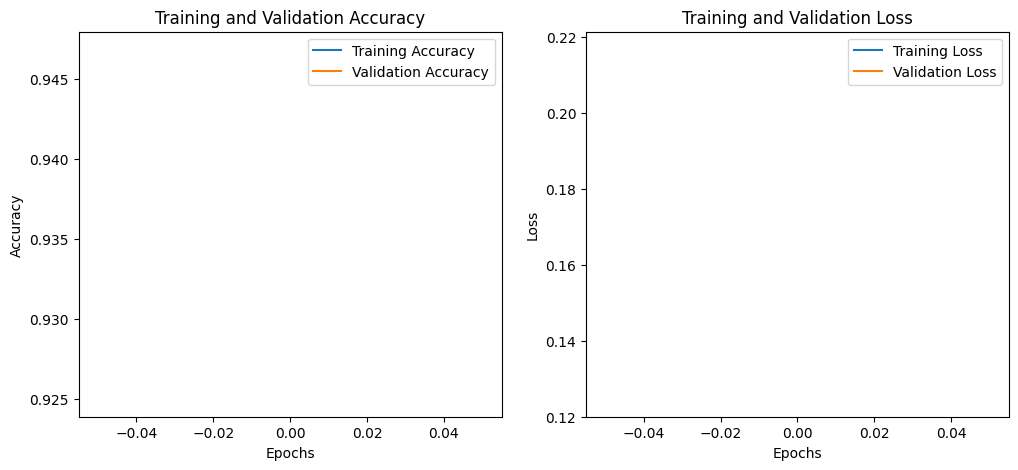

In [18]:
import matplotlib.pyplot as plt

# Assuming you have 'history' from the model training

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [20]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Get true labels and predictions
true_labels = []
predicted_labels = []

# Steps to iterate through the validation set
for i in range(validation_steps):
    images, labels = next(validation_generator)  # Get a batch of images and labels
    true_labels.extend(np.argmax(labels, axis=1))  # Get the true class index
    predictions = model.predict(images)  # Predict using the model
    predicted_labels.extend(np.argmax(predictions, axis=1))  # Get predicted class index

true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)



1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Found 22440 images belonging to 4 classes.
Found 5609 images belonging to 4 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
Unique true labels: [0 1]
Unique predicted labels: [0 1]


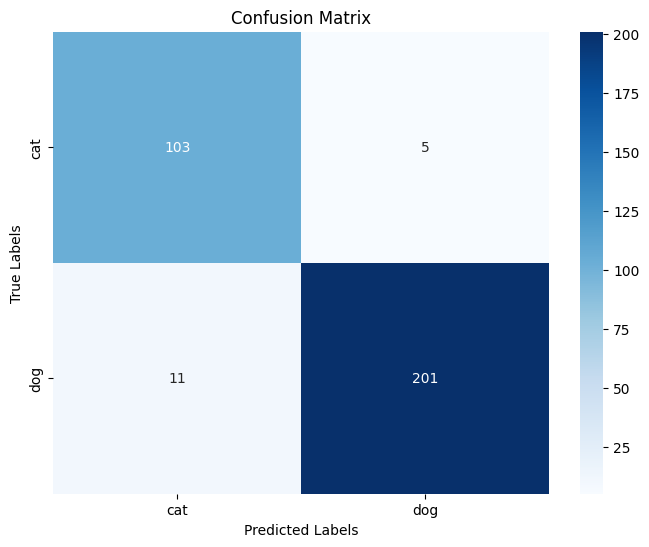

              precision    recall  f1-score   support

         cat       0.90      0.95      0.93       108
         dog       0.98      0.95      0.96       212

    accuracy                           0.95       320
   macro avg       0.94      0.95      0.94       320
weighted avg       0.95      0.95      0.95       320



In [24]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Get the class indices before wrapping with the custom generator
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 80% training, 20% validation split
)

train_generator_original = datagen.flow_from_directory(
    train_dir, target_size=target_size, batch_size=batch_size, class_mode='categorical', subset='training'
)

# Access the class indices
class_labels = {v: k for k, v in train_generator_original.class_indices.items()}  # Reverse the mapping

# Use the custom safe generator for training and validation as before
train_generator = safe_flow_from_directory(
    datagen, train_dir, target_size=target_size, batch_size=batch_size, class_mode='categorical', subset='training'
)

validation_generator = safe_flow_from_directory(
    datagen, train_dir, target_size=target_size, batch_size=batch_size, class_mode='categorical', subset='validation'
)

# Get true labels and predictions
true_labels = []
predicted_labels = []

for i in range(validation_steps):
    images, labels = next(validation_generator)  # Get a batch of images and labels
    true_labels.extend(np.argmax(labels, axis=1))  # Get the true class index
    predictions = model.predict(images)  # Predict using the model
    predicted_labels.extend(np.argmax(predictions, axis=1))  # Get predicted class index

true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Debugging: Check the unique labels
unique_true_labels = np.unique(true_labels)
unique_predicted_labels = np.unique(predicted_labels)

print(f"Unique true labels: {unique_true_labels}")
print(f"Unique predicted labels: {unique_predicted_labels}")

# Find the correct class labels for the unique classes in true_labels
filtered_class_labels = [class_labels[i] for i in unique_true_labels]

# Confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=filtered_class_labels, yticklabels=filtered_class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification report with filtered class labels
report = classification_report(true_labels, predicted_labels, target_names=filtered_class_labels)
print(report)

